# Milestone 3

Alex Peed, Kunal Shah, Willie Jin, Sam Lam

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
%matplotlib inline

In [130]:
data = pd.read_csv("/Users/AlexPeed/airbnb-pricing-prediction/datasets/listings.csv")

In [131]:
data.shape

(27392, 52)

In [132]:
data['price'] = (data['price'].str.replace(r'[^-+\d.]', '').astype(float))
data['weekly_price'] = (data['weekly_price'].str.replace(r'[^-+\d.]', '').astype(float))
data['monthly_price'] = (data['monthly_price'].str.replace(r'[^-+\d.]', '').astype(float))

In [134]:
col_names = list(data.columns.values)

In [135]:
nulls = []
for i in col_names:
    nulls.append(data[i].isnull().values.any())

In [136]:
col_nulls = pd.DataFrame({'col_name': col_names, 'null': nulls})

In [137]:
with_nulls = col_nulls[col_nulls.null == True]

In [138]:
data["price"].isnull().sum().sum()

0

In [139]:
footprice = pd.DataFrame({'price': data['price'], 'square_feet': data['square_feet']})
footprice = footprice.dropna()
footprice.head()

,price,square_feet
12,80.0,600.0
20,100.0,500.0
38,99.0,0.0
76,250.0,800.0
78,149.0,1000.0


In [141]:
footprice = footprice[(footprice.price < 1001) & (footprice.square_feet < 4000)]
footprice.head()

,price,square_feet
12,80.0,600.0
20,100.0,500.0
38,99.0,0.0
76,250.0,800.0
78,149.0,1000.0


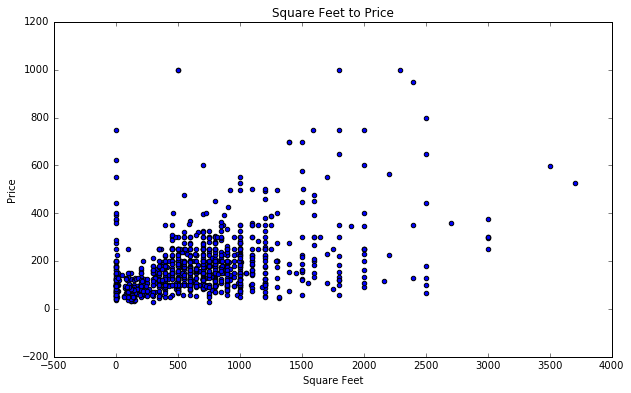

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(footprice['square_feet'] ,footprice['price'])
ax.set_xlabel('Square Feet')
ax.set_ylabel('Price')
ax.set_title('Square Feet to Price')

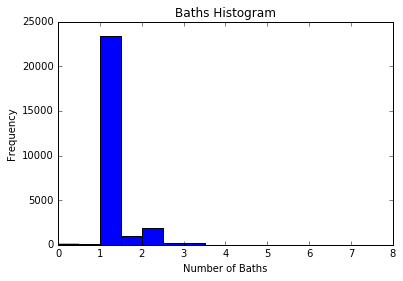

In [151]:
baths = data.bathrooms.dropna()

plt.hist(baths, 16)
plt.title("Baths Histogram")
plt.xlabel("Number of Baths")
plt.ylabel("Frequency")

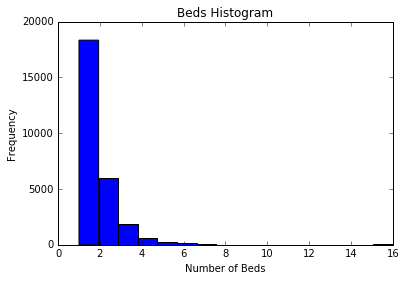

In [156]:
beds = data.beds.dropna()

plt.hist(beds, 16)
plt.title("Beds Histogram")
plt.xlabel("Number of Beds")
plt.ylabel("Frequency")

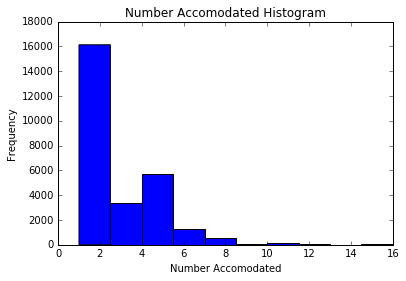

In [161]:
accommodates = data.accommodates.dropna()

plt.hist(accommodates)
plt.title("Number Accomodated Histogram")
plt.xlabel("Number Accomodated")
plt.ylabel("Frequency")

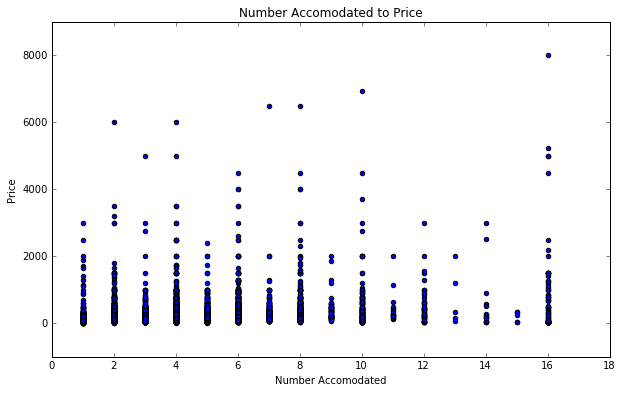

In [159]:
accprice = pd.DataFrame({'price': data['price'], 'accommodates': data['accommodates']})
accprice = accprice.dropna()

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(accprice['accommodates'] ,accprice['price'])
ax.set_xlabel('Number Accomodated')
ax.set_ylabel('Price')
ax.set_title('Number Accomodated to Price')